In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, converters
from numpy import pi
from math import floor, log2
from gates import *


In [3]:
# blatantly stole qft circuit generator from this:
# https://learn.qiskit.org/course/ch-algorithms/quantum-fourier-transform

# stolen from https://quantumcomputing.stackexchange.com/questions/29647/trying-to-construct-modular-exponentiation-gate-in-qiskit
# todo need to actually implement something.
# Basically, fix N (number to factor) and create modexp gate based on that.
# lucky me this code is for 15 lol ggez
# fixme uhh control
def c_7mod15_gate(power):

    U = QuantumCircuit(4)
    # https://quantumcomputing.stackexchange.com/questions/15280/how-does-this-represent-modular-multiplication

    for _ in range(power):
      U.x(range(4))
      U.swap(1, 2)
      U.swap(2, 3)
      U.swap(0, 3)

    U = U.to_gate()
    U.name = "%i^%i mod 15" % (7, power)
    c_U = U.control() ##.control(t)
    return c_U

def modexp(circuit, n):
   pass

def modexp_gate(n):
  qc = QuantumCircuit(n)
  qc.name = "QFT"
  modexp(qc, n)
  gate = converters.circuit_to_gate(qc)

  return gate


In [4]:
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city

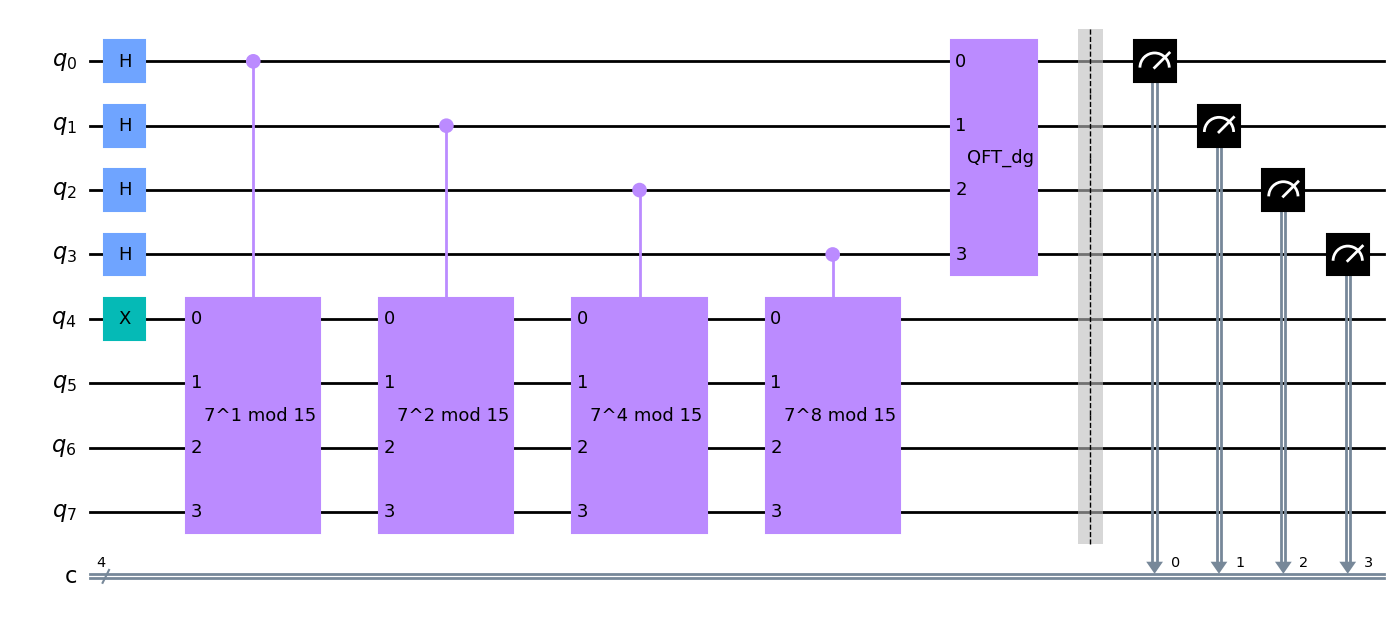

In [5]:
circ = QuantumCircuit(8, 4)

circ.h(range(4))


gate1 = c_7mod15_gate(1)
gate2 = c_7mod15_gate(2)
gate4 = c_7mod15_gate(4)
gate8 = c_7mod15_gate(8)
gate11 = c_7mod15_gate(16)
gate22 = c_7mod15_gate(32)
gate44 = c_7mod15_gate(64)
gate88 = c_7mod15_gate(128)

circ.x(4)
#circ.x(1) #lsb
#[circ.x(i) for i in range(1, 5)]
circ.append(gate1, [0, 4, 5, 6, 7])
circ.append(gate2, [1, 4, 5, 6, 7])
circ.append(gate4, [2, 4, 5, 6, 7])
circ.append(gate8, [3, 4, 5, 6, 7])
#circ.append(gate11, [4, 8, 9, 10, 11])
#circ.append(gate22, [5, 8, 9, 10, 11])
#circ.append(gate44, [6, 8, 9, 10, 11])
#circ.append(gate88, [7, 8, 9, 10, 11])

circ.append(qft_gate(4).inverse(), range(4))

circ.barrier(range(8))

circ.measure(range(4), range(4))
circ.draw("mpl")

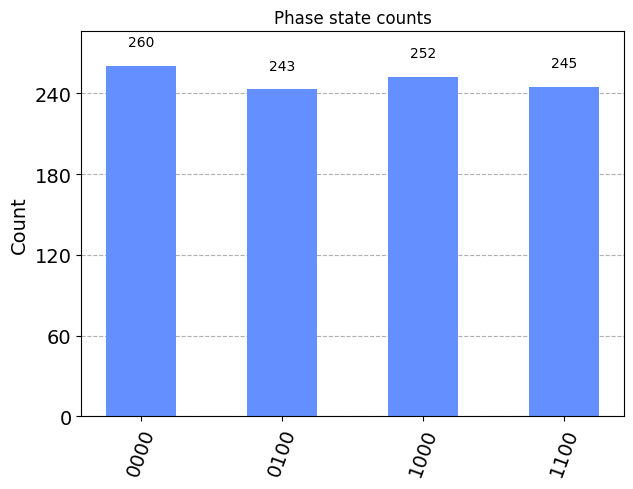

In [9]:
simulator = Aer.get_backend('aer_simulator')
transpiled_circ = transpile(circ, simulator)
result = simulator.run(transpiled_circ, shots=1000).result()
counts = result.get_counts(transpiled_circ)
plot_histogram(counts, title='Phase state counts')

In [8]:
# ok, This appears to work
